# **Tarefa 2 - Feature Engineering e Avaliação de Modelos**

#### **Dicas:**

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet

- Documentação do pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX

- Documentação do scikit-learn: https://scikit-learn.org/stable/

- Documentação do matplotlib: https://matplotlib.org/stable/index.html

- Documentação do seaborn: https://seaborn.pydata.org/tutorial.html

---

#### Dataset:

Este conjunto de dados reúne 110.527 agendamentos médicos e 14 variáveis (características). O objetivo típico é analisar e prever faltas em consultas médicas. A variável-alvo é No-show, que indica se o paciente faltou (True) ou compareceu (False) à consulta.

##### Colunas:
	1.	PatientId → Identificador do paciente.
	2.	AppointmentID → Identificador único do agendamento.
	3.	Gender → Sexo do paciente (Male ou Female). Observação do autor: há maior proporção de Female.
	4.	AppointmentDay → Data da consulta (quando o paciente deve ir ao médico).
	5.	ScheduledDay → Data em que o agendamento foi realizado (anterior à consulta).
	6.	Age → Idade do paciente.
	7.	Neighbourhood → Bairro/local onde a consulta ocorre.
	8.	Scholarship → True/False. Indica participação em programa social; ver Bolsa Família (https://pt.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
	9.	Hypertension → True/False. Indica diagnóstico de hipertensão.
	10.	Diabetes → True/False. Indica diagnóstico de diabetes.
	11.	Alcoholism → True/False. Indica alcoolismo.
	12.	Handcap → True/False. Indica deficiência (grafia no dataset: Handcap).
	13.	SMS_received → Número de SMS recebidos (0 = nenhum; 1 = um ou mais).
	14.	No-show → True/False. True = faltou; False = compareceu.



## **Importe os Pacotes**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

## **Crie os datasets**
### **Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD**
##### **Para o arquivo bairros.csv, crie um dicionário chamado `dict_bairro_zonas` usando pd.read_csv(.), com `index_col=0`, usando a coluna `regiao` e finalmente o comando .to_dict() para transformar em um dicionário**

In [2]:
df_bairros = pd.read_csv('bairros.csv', index_col=0)
dict_bairro_zonas = df_bairros['regiao'].to_dict()
print(dict_bairro_zonas)
print(df_bairros)

{'AEROPORTO': 'ZONA NORTE', 'ANDORINHAS': 'MARUÍPE', 'ANTÔNIO HONÓRIO': 'ZONA NORTE', 'ARIOVALDO FAVALESSA': 'SANTO ANTÔNIO', 'BARRO VERMELHO': 'ZONA LESTE', 'BELA VISTA': 'SANTO ANTÔNIO', 'BENTO FERREIRA': 'JUCUTUQUARA', 'BOA VISTA': 'JARDIM DA PENHA', 'BONFIM': 'MARUÍPE', 'CARATOÍRA': 'SANTO ANTÔNIO', 'CENTRO': 'ZONA SUL', 'COMDUSA': 'ZONA OESTE', 'CONQUISTA': 'ZONA OESTE', 'CONSOLAÇÃO': 'JUCUTUQUARA', 'CRUZAMENTO': 'JUCUTUQUARA', 'DA PENHA': 'MARUÍPE', 'DE LOURDES': 'JUCUTUQUARA', 'DO CABRAL': 'SANTO ANTÔNIO', 'DO MOSCOSO': 'ZONA SUL', 'DO QUADRO': 'SANTO ANTÔNIO', 'ENSEADA DO SUÁ': 'ZONA LESTE', 'ESTRELINHA': 'SANTO ANTÔNIO', 'FONTE GRANDE': 'ZONA SUL', 'FORTE SÃO JOÃO': 'JUCUTUQUARA', 'FRADINHOS': 'JUCUTUQUARA', 'GOIABEIRAS': 'ZONA NORTE', 'GRANDE VITÓRIA': 'SANTO ANTÔNIO', 'GURIGICA': 'JUCUTUQUARA', 'HORTO': 'JUCUTUQUARA', 'ILHA DAS CAIEIRAS': 'ZONA OESTE', 'ILHA DE SANTA MARIA': 'JUCUTUQUARA', 'ILHA DO BOI': 'ZONA LESTE', 'ILHA DO FRADE': 'ZONA LESTE', 'ILHA DO PRÍNCIPE': 'ZONA 

In [3]:
df_medical = pd.read_csv('medicalAppointmentNoShows.csv')
df_medical

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### **Remova as colunas Patient ID e AppointmentID**

In [4]:
df_medical_removida = df_medical.drop(['PatientId','AppointmentID'], axis=1)
df_medical_removida

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### **Crie a coluna `Regiao` mapeando os dados na coluna `Neighbourhood` usando o dicionário `dict_bairros_zonas` e o compando `.map()`. Depois, elimine a coluna `Neighbourhood`**

In [5]:
df_medical_removida['Regiao']=df_medical_removida['Neighbourhood'].map(dict_bairro_zonas)
df_medical_removida= df_medical_removida.drop('Neighbourhood', axis=1)
df_medical_removida

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Regiao
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No,JARDIM DA PENHA
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No,JARDIM DA PENHA
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No,JARDIM DA PENHA
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No,JARDIM DA PENHA
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No,JARDIM DA PENHA
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,0,1,No,ZONA NORTE
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,0,1,No,ZONA NORTE
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,0,1,No,ZONA NORTE
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,0,1,No,ZONA NORTE


### **Remova o horário das strings nas colunas de datas e depois transforme-as em formato de data com o pd.to_datetime(.).**

In [6]:

df_medical_removida['ScheduledDay'] = df_medical_removida['ScheduledDay'].apply(lambda x: x.split('T')[0])
df_medical_removida['AppointmentDay'] = df_medical_removida['AppointmentDay'].apply(lambda x: x.split('T')[0])
df_medical_removida['ScheduledDay'] = pd.to_datetime(df_medical_removida['ScheduledDay'])
df_medical_removida['AppointmentDay'] = pd.to_datetime(df_medical_removida['AppointmentDay'])
df_medical_removida

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Regiao
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,JARDIM DA PENHA
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,JARDIM DA PENHA
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,JARDIM DA PENHA
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,JARDIM DA PENHA
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,JARDIM DA PENHA
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,ZONA NORTE
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,ZONA NORTE
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,ZONA NORTE
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,ZONA NORTE


## **Feature Engineering**
Olhando para o dataset, que features poderiam ser criadas que seriam úteis para nossa tarefa de predição?

**Dica que quase não é dica**: Dias entre a data da consulta (AppointmentDay) e a data da marcação (ScheduledDay)

In [7]:

df_medical_removida['ScheduledDay'] = pd.to_datetime(df_medical_removida['ScheduledDay'])
df_medical_removida['AppointmentDay'] = pd.to_datetime(df_medical_removida['AppointmentDay'])
df_medical_removida['DiasDeEspera'] = (df_medical_removida['AppointmentDay'] - df_medical_removida['ScheduledDay']).dt.days
df_medical_removida['DiasDeEspera'] = df_medical_removida['DiasDeEspera'].clip(lower=0)

df_medical_removida

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Regiao,DiasDeEspera
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,JARDIM DA PENHA,0
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,JARDIM DA PENHA,0
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,JARDIM DA PENHA,0
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,JARDIM DA PENHA,0
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,JARDIM DA PENHA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,ZONA NORTE,35
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,ZONA NORTE,35
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,ZONA NORTE,41
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,ZONA NORTE,41


In [8]:
list_doencas_def = ['Hipertension','Diabetes','Alcoholism','Handcap']
df_medical_removida['qt_doencas_def']=df_medical_removida[list_doencas_def].sum(axis=1)
df_medical_removida

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Regiao,DiasDeEspera,qt_doencas_def
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,JARDIM DA PENHA,0,1
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,JARDIM DA PENHA,0,0
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,JARDIM DA PENHA,0,0
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,JARDIM DA PENHA,0,0
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,JARDIM DA PENHA,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,ZONA NORTE,35,0
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,ZONA NORTE,35,0
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,ZONA NORTE,41,0
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,ZONA NORTE,41,0


## **Pré-Processe os dados novamente**
**Dica 1:**
- Aproveite o que foi feito no trabalho anterior (remoção de outliers, transformação de valores e etc), lembrando que agora será necessario pré-processar as colunas novas criadas

**Dica 2:**
- Se estiver tendo problema com o OneHotEncoder criando valores NaN, resete o index do dataframe df original e do dataframe criado para o onehot para alinhar os dados

In [9]:
lista_numericas = ['Age']
lista_categóricas_discretizadas = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'qt_doencas_def'] # Adicionado 'qt_doencas_def'
lista_categóricas_a_ser_discretizadas = ['Gender', 'Regiao']

print("Variáveis numéricas:", lista_numericas)
print("Variáveis categóricas já discretizadas:", lista_categóricas_discretizadas)
print("Variáveis categóricas a serem discretizadas:", lista_categóricas_a_ser_discretizadas)

# Preenchimento de valores nulos para colunas numéricas
for col in lista_numericas:
  valor_preenchimento = df_medical_removida[col].median()

  if df_medical_removida[col].isnull().any():
      df_medical_removida[col] = df_medical_removida[col].fillna(valor_preenchimento)

      print(f"-> Coluna '{col}': Valores nulos preenchidos com a mediana ({valor_preenchimento:.2f})")

# Verificação final para confirmar que funcionou
print("\nVerificação de nulos APÓS o preenchimento:")
print(df_medical_removida[lista_numericas].isnull().sum())

linhas_antes = len(df_medical_removida)
print(f"Número de linhas antes da remoção dos outliers: {linhas_antes}")

# Remoção de outliers (aplicado apenas à coluna 'Age' conforme o código original, mas agora usando a lista_numericas)
for col in lista_numericas:
    Q1 = df_medical_removida[col].quantile(0.25)
    Q3 = df_medical_removida[col].quantile(0.75)
    IQR = Q3 - Q1
    abaixo_Q1 = Q1 - 1.5 * IQR
    acima_Q3 = Q3 + 1.5 * IQR
    df_medical_removida = df_medical_removida[(df_medical_removida[col] >= abaixo_Q1) & (df_medical_removida[col] <= acima_Q3)] # Corrigido para modificar o DataFrame

linhas_depois = len(df_medical_removida)
print(f"Número de linhas depois da remoção dos outliers: {linhas_depois}")

# Exibindo informações sobre colunas categóricas
for col in lista_categóricas_discretizadas:
    print(f"\n--- {col} ---")
    print("Categorias únicas:", df_medical_removida[col].nunique())
    print("Distribuição:")
    print(df_medical_removida[col].value_counts(normalize=True) * 100)

for col in lista_categóricas_a_ser_discretizadas:
    print(f"\n--- {col} ---")
    print("Categorias únicas:", df_medical_removida[col].nunique())
    print("Distribuição:")
    print(df_medical_removida[col].value_counts(normalize=True) * 100)

# Resetando o index para evitar problemas de alinhamento
df_medical_removida.reset_index(drop=True, inplace=True)


# One-Hot Encoding
encoder = OneHotEncoder(min_frequency=0.1, sparse_output=False, drop='first')
df_encoded = encoder.fit_transform(df_medical_removida[lista_categóricas_a_ser_discretizadas])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(lista_categóricas_a_ser_discretizadas), index=df_medical_removida.index) # Corrigido para usar o index do df_medical_removida


# Concatenando dataframes e removendo colunas originais
df = pd.concat([df_medical_removida.drop(lista_categóricas_a_ser_discretizadas, axis=1), df_encoded], axis=1)
display(df.head())

# Removendo colunas com '_infrequent' se existirem (ajustado para o nome do dataframe)
new_columns = [col for col in df.columns if '_infrequent' not in col]
df = df[new_columns]
display(df.head())

# Removendo colunas de data, pois já foram utilizadas para criar 'DiasDeEspera'
df = df.drop(['ScheduledDay', 'AppointmentDay'], axis=1)


Variáveis numéricas: ['Age']
Variáveis categóricas já discretizadas: ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'qt_doencas_def']
Variáveis categóricas a serem discretizadas: ['Gender', 'Regiao']

Verificação de nulos APÓS o preenchimento:
Age    0
dtype: int64
Número de linhas antes da remoção dos outliers: 110527
Número de linhas depois da remoção dos outliers: 110522

--- Scholarship ---
Categorias únicas: 2
Distribuição:
Scholarship
0    90.172997
1     9.827003
Name: proportion, dtype: float64

--- Hipertension ---
Categorias únicas: 2
Distribuição:
Hipertension
0    80.27542
1    19.72458
Name: proportion, dtype: float64

--- Diabetes ---
Categorias únicas: 2
Distribuição:
Diabetes
0    92.813196
1     7.186804
Name: proportion, dtype: float64

--- Alcoholism ---
Categorias únicas: 2
Distribuição:
Alcoholism
0    96.959881
1     3.040119
Name: proportion, dtype: float64

--- Handcap ---
Categorias únicas: 5
Distribuição:
Handcap
0    97.9

,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DiasDeEspera,qt_doencas_def,Gender_M,Regiao_MARUÍPE,Regiao_SANTO ANTÔNIO,Regiao_ZONA OESTE,Regiao_infrequent_sklearn
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,0,1,0.0,0.0,0.0,0.0,1.0
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,0,0,1.0,0.0,0.0,0.0,1.0
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,0,0,0.0,0.0,0.0,0.0,1.0
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,0,0,0.0,0.0,0.0,0.0,1.0
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,0,2,0.0,0.0,0.0,0.0,1.0


,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DiasDeEspera,qt_doencas_def,Gender_M,Regiao_MARUÍPE,Regiao_SANTO ANTÔNIO,Regiao_ZONA OESTE
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,0,1,0.0,0.0,0.0,0.0
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,0,0,1.0,0.0,0.0,0.0
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,0,0,0.0,0.0,0.0,0.0
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,0,0,0.0,0.0,0.0,0.0
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,0,2,0.0,0.0,0.0,0.0


## **Criação de Conjuntos de Treinamento e Teste**

Divida os dados em conjuntos de treino, validação e teste. Para isso, selecione aleatoriamente e sem reposição 75% dos registros para o conjunto de treinamento. As observações restantes (25%) serão para o conjunto de teste.

Dicas:
- Fixe a semente de geração de dados aleatórios (escolha um número), utilize o comando `np.random.seed(escolha um número)`, antes de executar qualquer célula de comando que possa variar de valor resultante toda vez que for executada.

- Para fazer a divisão de treino e teste use a função `train_test_split()`


In [10]:
X = df.drop('No-show', axis=1)
y = df['No-show']

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82891, 13)
(82891,)
(27631, 13)
(27631,)


## **Treine e Teste o Modelo de KNN**

Treinar cinco versões diferentes do modelo K-Nearest Neighbors (KNN) utilizando valores variados para o parâmetro K.

**Dica:**
- Busque pela função `KNeighborsClassifier(n_neighbors=?)` da biblioteca `scikitlearn`
- Para aplicar validação cruzada, dê uma olhada na função cross_val_score... (https://scikit-learn.org/stable/modules/cross_validation.html)

### **Calcule e mostre as métricas de precisão, cobertura (recall) e medida F1 para cada classe, além da acurácia, todas para o conjunto de validação.**

**Dica:**
- Para calcular as métricas do modelo busque pelas funções `accuracy_score()`, `recall_score()`, `precision_score()`, `f1_score()`

In [11]:
k_values = [3, 5, 7, 9, 11]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_train, y_train, cv=5)
    acc = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average=None)
    recall = recall_score(y_train, y_pred, average=None)
    f1 = f1_score(y_train, y_pred, average=None)
    print(f"K={k}:")
    print("  Acurácia: {:.4f}".format(acc))
    print("  Precisão por classe:", precision)
    print("  Recall por classe:", recall)
    print("  F1 por classe:", f1)
    print("-" * 30)
    results[k] = {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_train, y_train, cv=5)
    print(f"\nRelatório de Classificação para K={k}:")
    print(classification_report(y_train, y_pred))


K=3:
  Acurácia: 0.7532
  Precisão por classe: [0.81902303 0.33333333]
  Recall por classe: [0.88675824 0.22418332]
  F1 por classe: [0.85154578 0.26807369]
------------------------------
K=5:
  Acurácia: 0.7688
  Precisão por classe: [0.81545894 0.35384064]
  Recall por classe: [0.91826465 0.1772167 ]
  F1 por classe: [0.86381373 0.23615707]
------------------------------
K=7:
  Acurácia: 0.7753
  Precisão por classe: [0.81252465 0.35968901]
  Recall por classe: [0.93404053 0.14670336]
  F1 por classe: [0.8690554  0.20840593]
------------------------------
K=9:
  Acurácia: 0.7812
  Precisão por classe: [0.81068181 0.372268  ]
  Recall por classe: [0.94705109 0.12432691]
  F1 por classe: [0.87357652 0.18640115]
------------------------------
K=11:
  Acurácia: 0.7835
  Precisão por classe: [0.80838928 0.36861158]
  Recall por classe: [0.95519591 0.10356587]
  F1 por classe: [0.87568227 0.16170014]
------------------------------

Relatório de Classificação para K=3:
              precisi

## **Baseado no desempenho em validação, escolher o melhor modelo utilizando uma das métricas (justificando a escolha da métrica)**

De acordo com a média do Recall com a precisão, que é o F1, o melhor modelo é o com K=3, já que apresenta um F1 maior o que representa um equilibrio entre a mitigação de falsos positivos (precisão) e falsos negativos (recall).  



## **Avalie o modelo escolhido utilizando o dataset de teste**

In [12]:
k_melhor=3
knn_melhor=KNeighborsClassifier(n_neighbors=k_melhor)
knn_melhor.fit(X_train, y_train)
y_pred = knn_melhor.predict(X_test)
print(classification_report(y_test, y_pred))
y_test_pred = knn_melhor.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.82      0.89      0.85     22029
         Yes       0.35      0.23      0.28      5602

    accuracy                           0.76     27631
   macro avg       0.58      0.56      0.57     27631
weighted avg       0.72      0.76      0.74     27631

              precision    recall  f1-score   support

          No       0.82      0.89      0.85     22029
         Yes       0.35      0.23      0.28      5602

    accuracy                           0.76     27631
   macro avg       0.58      0.56      0.57     27631
weighted avg       0.72      0.76      0.74     27631



### **Gere, interprete e explique a Matriz de Confusão gerada**

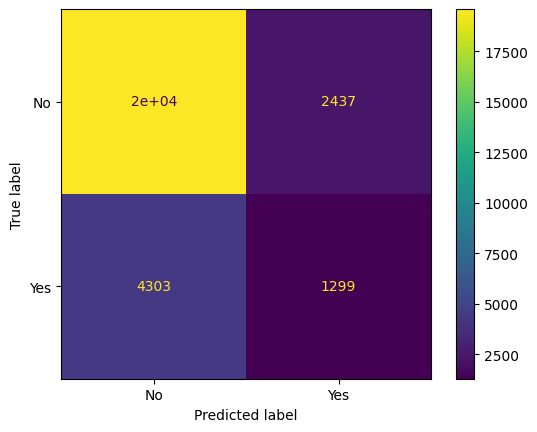

In [13]:
cm = confusion_matrix(y_test, y_test_pred, labels=knn_melhor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_melhor.classes_)

disp.plot()
plt.show()



Os elementos da matriz de confusão são:

*   Verdadeiros Positivos (VP):  O número de casos em que o modelo previu corretamente a classe positiva.
*   Verdadeiros Negativos (VN): O número de casos em que o modelo previu corretamente a classe negativa.
*   Falsos Positivos (FP): O número de casos em que o modelo previu incorretamente a classe positiva (erro Tipo I).
*   Falsos Negativos (FN): O número de casos em que o modelo previu incorretamente a classe negativa (erro Tipo II).


## **Mostre uma análise comparativa entre validação e teste para o modelo escolhido**
**Observação:** Se houver uma discrepância muito grande nos resultados, algo pode estar errado, verifique seu treinamento e avaliação do modelo.

In [14]:

validation_metrics = results[k_melhor]

y_test_pred = knn_melhor.predict(X_test)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

print(f"--- Comparação de Performance (K={k_melhor}) ---")
print("\nMétricas de Validação (Cross-validation):")
print(f"  Acurácia: {validation_metrics['accuracy']:.4f}")
print(f"  Precisão (No): {validation_metrics['precision'][0]:.4f}, Precisão (Yes): {validation_metrics['precision'][1]:.4f}")
print(f"  Recall (No): {validation_metrics['recall'][0]:.4f}, Recall (Yes): {validation_metrics['recall'][1]:.4f}")
print(f"  F1-score (No): {validation_metrics['f1'][0]:.4f}, F1-score (Yes): {validation_metrics['f1'][1]:.4f}")

print("\nMétricas de Teste:")
print(f"  Acurácia: {test_report['accuracy']:.4f}")
print(f"  Precisão (No): {test_report['No']['precision']:.4f}, Precisão (Yes): {test_report['Yes']['precision']:.4f}")
print(f"  Recall (No): {test_report['No']['recall']:.4f}, Recall (Yes): {test_report['Yes']['recall']:.4f}")
print(f"  F1-score (No): {test_report['No']['f1-score']:.4f}, F1-score (Yes): {test_report['Yes']['f1-score']:.4f}")

print("\nAnálise da Discrepância:")

if abs(validation_metrics['accuracy'] - test_report['accuracy']) > 0.02: # threshold de exemplo
    print("Há uma discrepância notável na acurácia entre validação e teste. Pode ser necessário revisar o modelo ou o pré-processamento.")
else:
    print("A acurácia entre validação e teste é consistente.")

--- Comparação de Performance (K=3) ---

Métricas de Validação (Cross-validation):
  Acurácia: 0.7532
  Precisão (No): 0.8190, Precisão (Yes): 0.3333
  Recall (No): 0.8868, Recall (Yes): 0.2242
  F1-score (No): 0.8515, F1-score (Yes): 0.2681

Métricas de Teste:
  Acurácia: 0.7561
  Precisão (No): 0.8199, Precisão (Yes): 0.3477
  Recall (No): 0.8894, Recall (Yes): 0.2319
  F1-score (No): 0.8532, F1-score (Yes): 0.2782

Análise da Discrepância:
A acurácia entre validação e teste é consistente.


In [15]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), lista_numericas),
#         ('cat', 'passthrough', lista_categóricas_discretizadas + [col for col in X_train.columns if 'Regiao_' in col or 'Gender_' in col]) # Use passthrough for already encoded categorical features
#     ]
# )

# knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('classifier', KNeighborsClassifier())])

# knn_pipeline.fit(X_train, y_train)

# print("Model training complete.")